인공지능학과 2021020381 한소현

## 1. Batch Normalization을 적용한 것과 적용하지 않은 ANN 모델 비교하기

필요한 패키지 import + random seed 설정

In [1]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_iris # iris 데이터 이용
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Activation, Softmax, LeakyReLU
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt

np.random.seed(1004)
tf.random.set_seed(1004)

Data load + feature, target setting + split of traininig/test data

In [2]:
def data_setting():
    iris = load_iris()
    iris_x = iris['data'] # 150개의 데이터 / 4개의 column
    iris_y = iris['target']
    label = np.unique(iris_y) # 3개의 label
    iris_y = to_categorical(iris_y) # one-hot encoding

    feature_num = iris_x.shape[1] # feature 개수 ==> 4
    class_num = len(label) # class의 개수 ==>  3
    
    # 150개의 데이터 ==> 120train / 30test
    x_train, x_test, y_train, y_test = train_test_split(iris_x, iris_y, test_size=0.2) 

    return x_train, x_test, y_train, y_test, feature_num, class_num

Setting

In [3]:
x_train, x_test, y_train, y_test, feature_num, class_num = data_setting()

신경망 생성

In [4]:
# bn_model : with batch normalization
bn_model = Sequential()
bn_model.add(Dense(20, input_dim=feature_num))
bn_model.add(BatchNormalization())
bn_model.add(Activation('relu'))
bn_model.add(Dense(class_num))
bn_model.add(Activation('Softmax'))

# no_bn_model : without batch normalization
no_bn_model = Sequential()
no_bn_model.add(Dense(20, input_dim=feature_num))
no_bn_model.add(Activation('relu'))
no_bn_model.add(Dense(class_num))
no_bn_model.add(Activation('Softmax'))

Train data

In [5]:
# bn_model
# model compile
bn_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
# model training
epoch = 50
history_train_bn = bn_model.fit(x_train, y_train, epochs=epoch, batch_size=32, verbose=0)
# test data evaluation
scores_train_bn = bn_model.evaluate(x_train, y_train)

# no_bn_model
# model compile
no_bn_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
# model training
history_train_nbn = no_bn_model.fit(x_train, y_train, epochs=epoch, batch_size=32, verbose=0)
# test data evaluation
scores_train_nbn = no_bn_model.evaluate(x_train, y_train)

# Comparing the results
print("\n========================   Results   ========================")
print("with batch normalization %s: %.2f%%" % (bn_model.metrics_names[1], scores_train_bn[1]*100))
print("without batch noramlization %s: %.2f%%" % (no_bn_model.metrics_names[1], scores_train_nbn[1]*100))

4/4 [==============================] - 0s 1ms/step - loss: 0.7614 - accuracy: 0.7083

========================   Results   ========================
with batch normalization accuracy: 77.50%
without batch noramlization accuracy: 70.83%


Test data

In [6]:
# bn_model
# model compile
bn_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
# model training
epoch = 50
history_test_bn = bn_model.fit(x_train, y_train, epochs=epoch, batch_size=32, verbose=0)
# test data evaluation
scores_test_bn = bn_model.evaluate(x_test, y_test)

# no_bn_model
# model compile
no_bn_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
# model training
history_test_nbn = no_bn_model.fit(x_train, y_train, epochs=epoch, batch_size=32, verbose=0)
# test data evaluation
scores_test_nbn = no_bn_model.evaluate(x_test, y_test)

# Comparing the results
print("\n========================   Results   ========================")
print("with batch normalization %s: %.2f%%" % (bn_model.metrics_names[1], scores_test_bn[1]*100))
print("without batch noramlization %s: %.2f%%" % (no_bn_model.metrics_names[1], scores_test_nbn[1]*100))

1/1 [==============================] - 0s 64ms/step - loss: 0.4155 - accuracy: 0.9667

========================   Results   ========================
with batch normalization accuracy: 83.33%
without batch noramlization accuracy: 96.67%


## Training data 시각화 해보기

accuracy 시각화

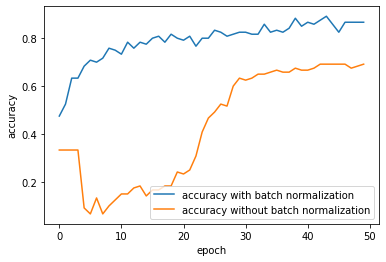

In [7]:
plt.figure(num=0, figsize=[6,4])
plt.plot(range(epoch), history_train_bn.history['accuracy'], label="accuracy with batch normalization")
plt.plot(range(epoch), history_train_nbn.history['accuracy'], label="accuracy without batch normalization")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()

loss 시각화

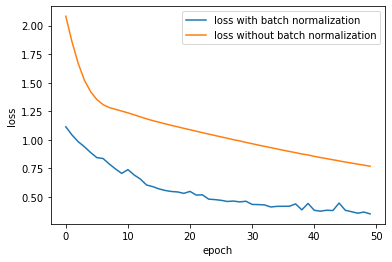

In [8]:
plt.figure(num=0, figsize=[6,4])
plt.plot(range(epoch), history_train_bn.history['loss'], label="loss with batch normalization")
plt.plot(range(epoch), history_train_nbn.history['loss'], label="loss without batch normalization")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

네트워크의 레이어를 통과할 때 마다 covariate shift가 일어나면서 입력의 분포가 약간씩 변하는 현상이 발생한다. 이를 막기 위해서 각 레이어 입력의 평균을 0, 표준편차 1인 입력값으로 정규화시키는 방법을 whitening이라고 한다. whitening은 covariance matrix의 계산과 inverse의 계산을 필요로 하기 때문에 계산량이 많다. 또한 일부 parameter의 영향이 무시된다. 이러한 문제점을 해결하기 위해서 Batch Normalization이 제안되었다. 이는 평균과 분산을 조정하는 과정이 별도로 진행되지 않는다. 조정 과정이 신경망 안에 포함되어서 평균과 분산을 조정하도록 하는 것이다. 즉, 각 레이어마다 정규화하는 레이어를 두고, 변형된 분포가 나오지 않도록 조절한다.

위의 batch normalization을 적용한 모델(파란색 그래프)과 적용하지 않은 모델(노란색 그래프)의 학습 곡선을 그려보았을 때, batch normalization을 적용한 그래프가 훨씬 더 성능이 좋고, 수렴 속도도 빠른 것을 알 수 있다. 

## 2-1. 임의의 볼록 함수를 정의하고 그것의 최소값을 구하는 계산을 SGD를 적용하여 해결합니다. 이 때 SGD를 적용하여야 함을 주의하자.

$f(x) = x^4 -4x^3 + 27$ <br/>
$f'(x) = 4x^3 - 12x^2$

=====[마지막으로 끝난 지점에서의 x, y 값]=====
( 2.999999999999994 0.0 )


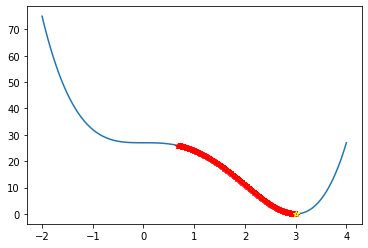

In [9]:
def get_values(x): # 함수값과 도함수값 가져오는 함수
    y = pow(x, 4) - 4 * pow(x, 3) + 27
    grad = 4 * pow(x, 3) - 12 * pow(x, 2)
    return y, grad

x = 1 * np.random.rand(1) # initial
y, _ = get_values(x) # initial
x_gd = [x]; y_gd = [y]
alpha = 0.001

for i in range(0, 20000):
    dydx = 4 * pow(x, 3) - 12 * pow(x, 2)
    x = x - alpha * dydx
    y, _ = get_values(x)
    x_gd.append(x)
    y_gd.append(y)

x_range = np.linspace(-2, 4, 110); y_range = []
for i in x_range:
    y, _ = get_values(i)
    y_range.append(y)
    
plt.plot(x_range, y_range)
plt.plot(x_gd, y_gd, linestyle="none", marker='*', markeredgecolor="red")
real_value, _ = get_values(3)
plt.plot(3, real_value, marker="*", markeredgecolor="yellow")

print("=====[마지막으로 끝난 지점에서의 x, y 값]=====")
print("(", x_gd[-1][0], y_gd[-1][0], ")")

# 2-2. 정의한 블록 함수 최솟값 문제를 다시 Newton method를 적용하여 해결합니다.

=====[마지막으로 끝난 지점에서의 x, y 값]=====
( 3.0000658472530515 7.80477904527288e-08 )


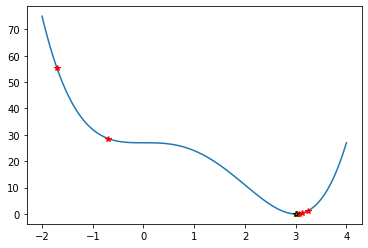

In [10]:
x = -2 * np.random.rand(1); diff = 10 # initial
x_list = []; y_list = []
for i in range(2000):
    y, gradient = get_values(x)
    x_list.append(x); y_list.append(y)

    x_new = x - (y / gradient)
    y_new, _ = get_values(x_new)
    diff = abs(x - x_new)

    x = x_new
    y = y_new
    if diff < 0.0001:
        x_list.append(x); y_list.append(y)
        break

x_range = np.linspace(-2, 4, 110); y_range = []
for i in x_range:
    y, _ = get_values(i)
    y_range.append(y)
    
plt.plot(x_range, y_range)
plt.plot(x_list, y_list, c="red", linestyle="none", marker='*', markeredgecolor="red")
plt.plot(3, real_value, marker="*", markeredgecolor="yellow") # 실제값 표시
plt.plot(x_list[-1], y_list[-1], marker="*", markeredgecolor="black") # 마지막 수렴값 표시
print("=====[마지막으로 끝난 지점에서의 x, y 값]=====")
print("(", x_list[-1][0], y_list[-1][0], ")")

# 2-3. 두 방법을 적용한 것을 비교 분석합니다.

### SGD
SGD(Stochastic Gradient Descent) 방법은 loss function을 계산할 때, 전체 데이터(batch)를 사용하는 대신에 데이터의 일부(mini-batch)를 사용하는 것을 말한다. 일부의 데이터만을 사용하기 때문에 전체 데이터를 사용할 때보다는 부정확할 수 있지만, 계산 속도가 빨라서 같은 시간에 더 많은 step을 갈 수 있다는 장점이 있다. alpha값을 너무 작게 설정하면 최소값에 도달하기 전에 학습이 끝나버리는 문제가 발생했다. 따라서 적절한 alpha값 설정이 중요하다.

### Newton method
Newton method는 $f'(x) = 0$의 해를 근사적으로 찾을 때 유용한 방법이다. $f(x)$가 연속이고 미분 가능해야 한다는 조건이 필요하다. 또한 $f(x) = 0$인 해가 여러 개가 있을 경우에 하나의 해만을 찾아준다. 특히 초기값 설정이 중요하다. 똑같은 문제여도 초기값 설정에 따라서 수렴하는 속도에 차이가 생기게 된다. $f'(x) = 0$이 된다면 발산하게 되어, 계산이 불가능하다.


위의 그래프에서 노란색 별은 실제 최소값을 의미한다. 실제 최소값은 (3, 0)으로 2000번의 반복을 사용했을 때, SGD를 사용한 모델은 약 (2.999999999999994, 0.0)의 값을 보여주므로 거의 최소값에 근사했다고 볼 수 있다. 
Newton method에서는 이전 값과의 차이인 diff를 설정해두고, 그 이하가 될 때 멈추는 방법을 이용한다. 두 번째 그래프를 보면, 그래프를 따라 이동하는 SGD 모델과는 다르게 빠른 속도로 수렴하는 것을 알 수 있다. 마지막 근사값이 (3.0000658472530515, 7.80477904527288e-08)으로 Newton method로도 최소값을 구할 수 있음을 알 수 있다.

# 3.ReLu와 leaky ReLu 활성함수를 적용한 예제를 통하여 두가지 활성함수를 비교 분석합니다.

변수 지우기

In [11]:
%reset -f

데이터 로딩 및 데이터 세팅 (앞 부분과 동일)

In [12]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_iris # iris 데이터 이용
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Activation, Softmax, LeakyReLU
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt

np.random.seed(100)
tf.random.set_seed(100)

def data_setting():
    iris = load_iris()
    iris_x = iris['data'] # 150개의 데이터 / 4개의 column
    iris_y = iris['target']
    label = np.unique(iris_y) # 3개의 label
    iris_y = to_categorical(iris_y) # one-hot encoding

    feature_num = iris_x.shape[1] # feature 개수 ==> 4
    class_num = len(label) # class의 개수 ==>  3

    x_train, x_test, y_train, y_test = train_test_split(iris_x, iris_y, test_size=0.2) # 150개의 데이터 ==> 120train / 30test

    return x_train, x_test, y_train, y_test, feature_num, class_num

x_train, x_test, y_train, y_test, feature_num, class_num = data_setting()

신경망 생성

In [13]:
# rl_model : use ReLu
rl_model = Sequential()
rl_model.add(Dense(20, input_dim=feature_num))
rl_model.add(BatchNormalization())
rl_model.add(Activation('relu'))
rl_model.add(Dense(class_num))
rl_model.add(Activation('Softmax'))

# lrl_bn_model : use leaky ReLu
lrl_model = Sequential()
lrl_model.add(Dense(20, input_dim=feature_num))
lrl_model.add(BatchNormalization())
lrl_model.add(LeakyReLU())
lrl_model.add(Dense(class_num))
lrl_model.add(Activation('Softmax'))

Train data

In [14]:
# rl_model
# model compile
rl_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
# model training
epoch = 50
history_train_rl = rl_model.fit(x_train, y_train, epochs=epoch, batch_size=5, verbose=0)
# test data evaluation
scores_train_rl = rl_model.evaluate(x_train, y_train)

# lrl_model
# model compile
lrl_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
# model training

history_train_lrl = lrl_model.fit(x_train, y_train, epochs=epoch, batch_size=5, verbose=0)
# test data evaluation
scores_train_lrl = lrl_model.evaluate(x_train, y_train)

# Comparing the results
print("\n========================   Results   ========================")
print("Using ReLu function %s: %.2f%%" % (rl_model.metrics_names[1], scores_train_rl[1]*100))
print("Using leaky ReLu function %s: %.2f%%" % (lrl_model.metrics_names[1], scores_train_lrl[1]*100))

4/4 [==============================] - 0s 2ms/step - loss: 0.2716 - accuracy: 0.9083

========================   Results   ========================
Using ReLu function accuracy: 91.67%
Using leaky ReLu function accuracy: 90.83%


## Training data 시각화 해보기

accuracy 시각화

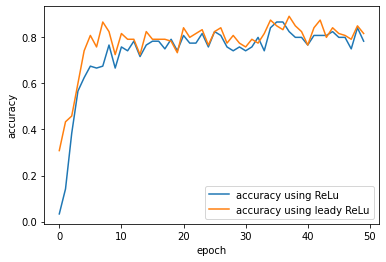

In [15]:
plt.figure(num=0, figsize=[6,4])
plt.plot(range(epoch), history_train_rl.history['accuracy'], label="accuracy using ReLu")
plt.plot(range(epoch), history_train_lrl.history['accuracy'], label="accuracy using leady ReLu")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()

loss 시각화

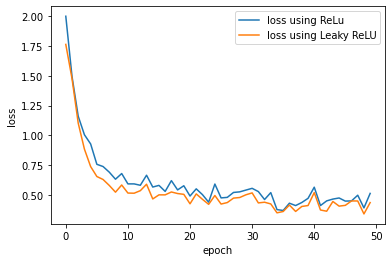

In [16]:
plt.figure(num=0, figsize=[6,4])
plt.plot(range(epoch), history_train_rl.history['loss'], label="loss using ReLu")
plt.plot(range(epoch), history_train_lrl.history['loss'], label="loss using Leaky ReLU")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

Test data

In [17]:
# rl_model
# model compile
rl_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
# model training
epoch = 50
history_test_rl = rl_model.fit(x_train, y_train, epochs=epoch, batch_size=5, verbose=0)
# test data evaluation
scores_test_rl = rl_model.evaluate(x_test, y_test)

# lrl_model
# model compile
lrl_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
# model training

history_test_lrl = lrl_model.fit(x_train, y_train, epochs=epoch, batch_size=5, verbose=0)
# test data evaluation
scores_test_lrl = lrl_model.evaluate(x_test, y_test)

# Comparing the results
print("\n========================   Results   ========================")
print("Using ReLu function %s: %.2f%%" % (rl_model.metrics_names[1], scores_test_rl[1]*100))
print("Using leaky ReLu function %s: %.2f%%" % (lrl_model.metrics_names[1], scores_test_lrl[1]*100))

1/1 [==============================] - 0s 80ms/step - loss: 0.1958 - accuracy: 0.9333

========================   Results   ========================
Using ReLu function accuracy: 96.67%
Using leaky ReLu function accuracy: 93.33%


ReLU는 가장 많이 사용되는 활성화 함수 중 하나로, Sigmoid 함수와 tanh가 가지는 gradient vanishing 문제를 해결하기 위한 함수이다. 하지만, 한번 0 활성화 값을 다음 레이어에 전달하면, 이후의 뉴런 출력값들이 모두 0이 되는 현상이 발생한다. 이것을 dying ReLU라 한다. 

이러한 한계점을 개선하기 위해서 Leaky ReLU가 제안되었다. 즉, x가 음수인 값에 대하여 미분값이 0이 되지 않는다는 점을 제외하면 ReLU와 동일한 특성을 가진다.

위의 두 개의 그래프를 보면, accuracy와 loss 모두 Leaky ReLU과 ReLU보다는 조금 좋은 성능을 보인다. 하지만, 거의 비슷한 성능을 나타낸다. Leaky ReLU는 ReLU보다 연산량이 많기 때문에 연산비용이 크다는 점을 생각하면, 비슷한 성능을 나타낼 때, ReLU를 사용하는 것이 낫다고 판단할 수 있다. 실제로도, ReLU를 더 많이 사용한다.

# 4. 최적화 문제를 정의하고, 경사하강법을 적용하여 해결합니다. (ANN, 회귀문제 제외)

$L = (x - 2)^2 + y^2 + (x - 2)y$

gradient descent 방법을 이용하여 위의 최적화 문제를 풀어보았다.

In [18]:
x = np.random.rand(1) * 10
y = np.random.rand(1) * 10
alpha = 0.001

x_list = []; y_list = []; L_list = []
epoch = 2000

for i in range(epoch):
    L = pow((x - 2),2) + pow(y,2) + (x - 2)*y
    dLdx = 2*(x - 2) + y
    dLdy = 2*y + x - 2

    x = x - alpha * dLdx
    y = y - alpha * dLdy

    x_list.append(x)
    y_list.append(y)
    L_list.append(L)


plot으로 시각화해보기

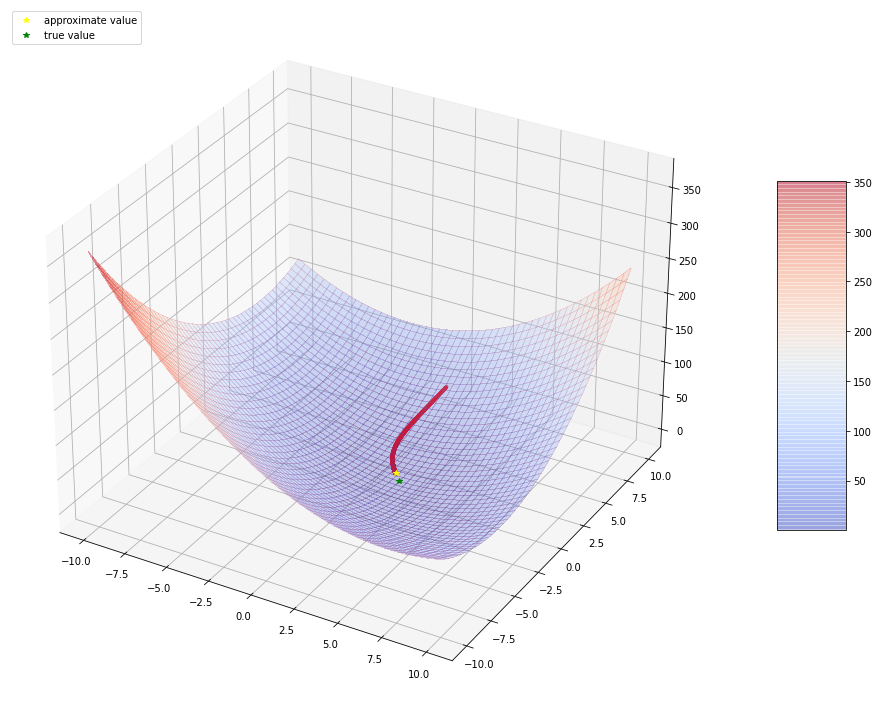

In [19]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=[20,10])
# ax = fig.gca(projection='3d')
ax = fig.add_subplot(111, projection='3d')

x = y = np.arange(-10,10,0.01)
x,y = np.meshgrid(x, y)

L = pow((x - 2),2) + pow(y,2) + (x - 2)*y
ax.scatter(x_list, y_list, L_list, marker='o', c="red", s=10)

surf = ax.plot_surface(x, y, L, cmap='coolwarm', linewidth=0, antialiased=False, alpha=0.3)
wire = ax.plot_wireframe(x, y, L, color="r", linewidth=0.1)
# approximate point
ax.plot(x_list[-1], y_list[-1], L_list[-1], linestyle="none", \
    marker='*', markeredgecolor="yellow", mfc="yellow", \
    zorder=1000000, label="approximate value") 
# true point
ax.plot(2, 0, 0, linestyle="none", marker='*', markeredgecolor="green", \
    mfc="green", zorder=999999, label="true value") 

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.legend(loc='upper left')
fig.tight_layout()
plt.show()

위의 그래프에서 초록색 점은 주어진 최적화 문제에서의 실제 최소값을 나타낸다. 노란색 점은 경사하강법을 이용하여 최소값을 찾았을 때, 마지막 근사값을 의미한다. 거의 실제값에 가까워지는 것을 볼 수 있다.